In [1]:
import data
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn
plt.style.use("seaborn-notebook")

# Solution to Exercise 3b (Nov. 25, 2021)
---

### Smoothing in 1D

In the last exercise, we have seen that the under-determined solution cannot be solved without regularization. Damping, as our first approach to regularization, allowed to solve the problem, but only provides reasonable estimates for small damping parameters at the locations where data has been acquired. Inbetween (in the model null space) the solution is damped, i.e. kept close to zero.

A more realistic form of regularization in this case is smoothing, as it avoids the strong jumps in the model appearing in the damped solution.

## Your task:

Formulate a smoothing matrix that approximates the first derivative of adjacent model parameters, i.e., that favors a smooth parameter evolution along the x-axis.

Solve the problem using smoothness constraints. Again, vary the regularizuation parameter and select a suitable regularization strength. Plot the result for different smoothing strengths. What is the effect? What is the smoothest possible model?

In [2]:
x, z = data.get_true_topography()
x_b = np.linspace(0, 100, 10)

d = data.get_data()
d_s = d[::3]

v = 2500
G = np.eye(10) * -2/v
G_s = G[::3]

**Solution**:

Here, we use the regularized least-squares solution with smoothing.

$$
\mathbf{m}_\mathrm{est} = [\mathbf{G}^T \mathbf{G} + \beta \, \mathbf{W}^T\mathbf{W} ]^{-1} \, \mathbf{G}^T \mathbf{d}
$$

In [3]:
Nm = G_s.shape[-1]
Wm = np.eye(Nm - 1, Nm, k=1) - np.eye(Nm - 1, Nm)
Wm.shape

(9, 10)

In [4]:
Wm

array([[-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

You can use [plt.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show a matrix. Here, we use the heatmap function in the seaborn package, which offers a bit more functionality. See documentation and examples here: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

Text(0.5, 1.0, 'Smoothing matrix W$_m$')

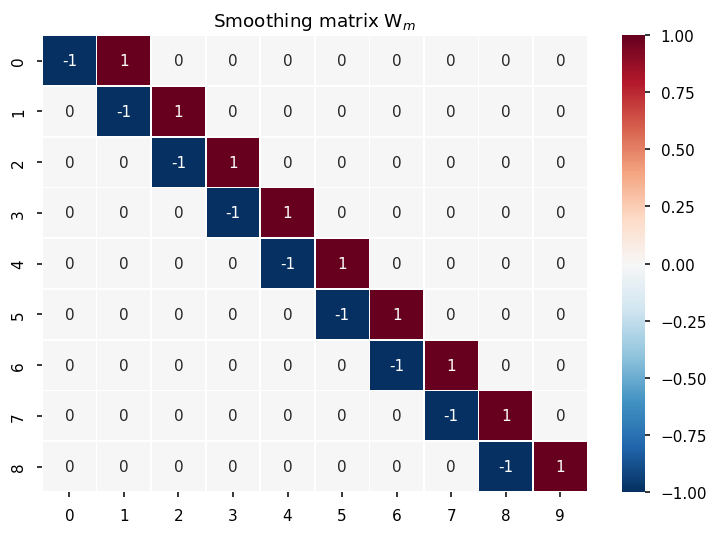

In [5]:
plt.figure(dpi=110)
seaborn.heatmap(Wm, annot=True, cmap="RdBu_r", linewidths=.5)
plt.title("Smoothing matrix W$_m$")

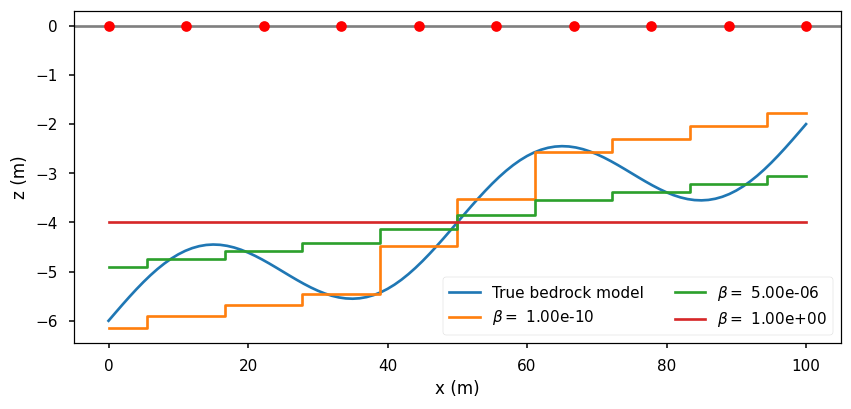

In [6]:
GtG = G_s.T @ G_s

plt.figure(figsize=(9,4), dpi=110)
plt.axhline(0, ls="-", c="k", alpha=0.5)
plt.plot(x, z, label="True bedrock model")

for beta in 1e-10, 5e-6, 1:
    m_smooth = np.linalg.inv(GtG + beta * Wm.T @ Wm) @ G_s.T @ d_s
    plt.step(x_b, m_smooth, where="mid", label=r"$\beta =$ %.2e" % beta)

plt.plot(x_b, np.zeros_like(x_b), "ro")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.legend(ncol=2)